# 웹에서 크롤링 해 온 데이터 csv 파일로 저장하기

In [97]:
import pandas as pd
import numpy as np

In [98]:
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [99]:
pd.read_html(url)

[   종로구   중구  용산구  성동구  광진구  동대문구  중랑구  성북구  강북구  도봉구  노원구  은평구 서대문구
 0   29   22   60   61   22    46   44   48   28   49   50   66   41
 1  마포구  양천구  강서구  구로구  금천구  영등포구  동작구  관악구  서초구  강남구  송파구  강동구   기타
 2   57   72  109   91   39    74   72  145   68  101  100   49   99,
     종로구   중구  용산구  성동구  광진구 동대문구
 0    29   22   60   61   22   46
 1   중랑구  성북구  강북구  도봉구  노원구  은평구
 2    44   48   28   49   50   66
 3  서대문구  마포구  양천구  강서구  구로구  금천구
 4    41   57   72  109   91   39
 5  영등포구  동작구  관악구  서초구  강남구  송파구
 6    74   72  145   68  101  100
 7   강동구   기타  NaN  NaN  NaN  NaN
 8    49   99  NaN  NaN  NaN  NaN,
      소계  해외접촉관련  송파구교회관련  강서구요양시설관련  강남구사무실관련  강남구사무실K빌딩  강남구역삼동모임  리치웨이관련  \
 0  1662     358       19         26        29          7        13     122   
 
    부천시쿠팡관련  관악구사무실관련  이태원클럽관련  구로구콜센터관련  타 시·도확진자접촉자   기타  경로확인중  
 0       24        14      139        98           57  577    179  ,
                                                    0
 0  < 신종 코로나바이러스 감염증 예방 국민 행동수칙

In [100]:
table = pd.read_html(url)
len(table)

8

In [101]:
#행과 열 순서 바꾸기 : .T
table[2].T

,0
소계,1662
해외접촉관련,358
송파구교회관련,19
강서구요양시설관련,26
강남구사무실관련,29
강남구사무실K빌딩,7
강남구역삼동모임,13
리치웨이관련,122
부천시쿠팡관련,24
관악구사무실관련,14


In [102]:
df = table[6]
df.shape

(1662, 7)

In [103]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1662,14553,8.7.,영등포구,-,강남구 확진자 접촉,서남병원
1,1661,14550,8.7.,서초구,-,서초구 확진자 접촉,서울의료원
2,1660,14555,8.7.,동작구,-,동작구 확진자 접촉,서남병원
3,1659,14549,8.7.,마포구,-,확인 중,서남병원
4,1658,14560,8.7.,성북구,-,확인 중,서북병원


In [104]:
# 확진일 데이터를 n번 인덱스 정보만 가져오기
last_day = df.loc[0, "확진일"]

last_day

'8.7.'

In [105]:
# last_day의 .을 _로 대체해줘라
last_day = last_day.replace(".","_")
last_day

'8_7_'

In [106]:
#파일명 만들어 주기
file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_8_7_.csv'

In [107]:
#csv 파일로 저장하기
df.to_csv(file_name, index = False)
#encoding = 'cp949': 엑셀로 읽어오는 인코딩
#index = False: df.head()에서 생긴 인덱스 삭제

In [108]:
# 제대로 저장되었는지 확인하기
pd.read_csv(file_name)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1662,14553,8.7.,영등포구,-,강남구 확진자 접촉,서남병원
1,1661,14550,8.7.,서초구,-,서초구 확진자 접촉,서울의료원
2,1660,14555,8.7.,동작구,-,동작구 확진자 접촉,서남병원
3,1659,14549,8.7.,마포구,-,확인 중,서남병원
4,1658,14560,8.7.,성북구,-,확인 중,서북병원
...,...,...,...,...,...,...,...
1657,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1658,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1659,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1660,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


# 서울시에서 공개한 코로나 19 발생동향 분석

In [109]:
# 데이터 분석하는 라이브러리
import pandas as pd
# 수치 계산하는 라이브러리
import numpy as np

In [110]:
file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_8_7_.csv'

In [111]:
df = pd.read_csv(file_name)
df.shape

(1662, 7)

In [112]:
df

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1662,14553,8.7.,영등포구,-,강남구 확진자 접촉,서남병원
1,1661,14550,8.7.,서초구,-,서초구 확진자 접촉,서울의료원
2,1660,14555,8.7.,동작구,-,동작구 확진자 접촉,서남병원
3,1659,14549,8.7.,마포구,-,확인 중,서남병원
4,1658,14560,8.7.,성북구,-,확인 중,서북병원
...,...,...,...,...,...,...,...
1657,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1658,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1659,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1660,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


In [113]:
#연번을 기준으로 내림차순으로 정렬
df = df.sort_values(by="연번", ascending = False)

In [114]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1662,14553,8.7.,영등포구,-,강남구 확진자 접촉,서남병원
1,1661,14550,8.7.,서초구,-,서초구 확진자 접촉,서울의료원
2,1660,14555,8.7.,동작구,-,동작구 확진자 접촉,서남병원
3,1659,14549,8.7.,마포구,-,확인 중,서남병원
4,1658,14560,8.7.,성북구,-,확인 중,서북병원


In [115]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1662,14553,8.7.,영등포구,-,강남구 확진자 접촉,서남병원
1,1661,14550,8.7.,서초구,-,서초구 확진자 접촉,서울의료원
2,1660,14555,8.7.,동작구,-,동작구 확진자 접촉,서남병원
3,1659,14549,8.7.,마포구,-,확인 중,서남병원
4,1658,14560,8.7.,성북구,-,확인 중,서북병원


# 시각화 도구 불러오기 

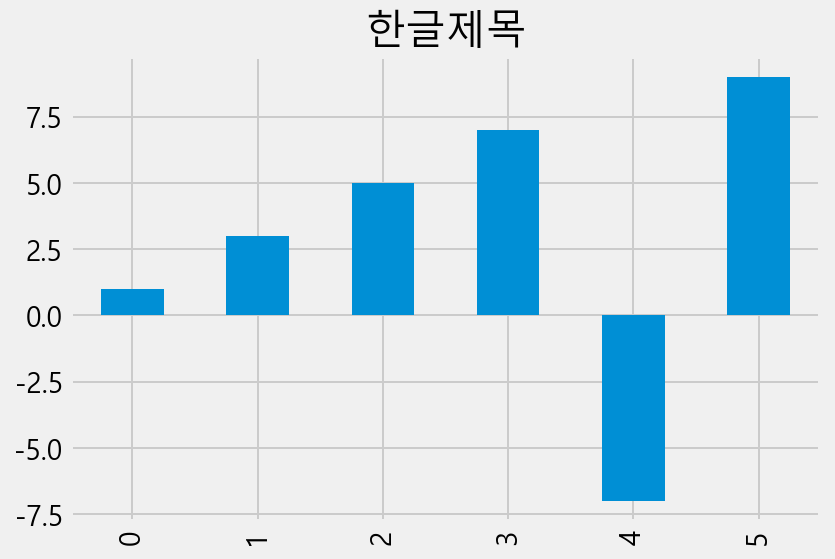

In [116]:
# matplotlib.pyplot
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)   
plt.style.use("fivethirtyeight")


pd.Series([1,3,5,7,-7,9]).plot.bar(title = "한글제목")

In [117]:
# 시각화 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 확진일

In [118]:
# 날짜별 확진일 빈도 내림차순
df["확진일"].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
3.5.      1
5.31.     1
2.6.      1
4.30.     1
5.17.     1
Name: 확진일, Length: 169, dtype: int64

In [119]:
df["확진일"].head(1)

0    8.7.
Name: 확진일, dtype: object

In [120]:
# 데이터 타입을 변경해서 날짜로 변환
# 연도 추가하고 , 을 -로 대체

df["확진일자"] = pd.to_datetime("2020-"+df["확진일"].str.replace(".","-"))
df[["확진일","확진일자"]].head()

,확진일,확진일자
0,8.7.,2020-08-07
1,8.7.,2020-08-07
2,8.7.,2020-08-07
3,8.7.,2020-08-07
4,8.7.,2020-08-07


In [121]:
# 월만 추출
df["월"] = df["확진일자"].dt.month
df[["확진일","확진일자", "월"]].tail()

,확진일,확진일자,월
1657,1.31.,2020-01-31,1
1658,1.30.,2020-01-30,1
1659,1.30.,2020-01-30,1
1660,1.30.,2020-01-30,1
1661,1.24.,2020-01-24,1


In [122]:
# 해당연도의 몇번째 주인지 추출
df["주"] =  df["확진일자"].dt.week
df[["확진일","확진일자", "월", "주"]].head()

,확진일,확진일자,월,주
0,8.7.,2020-08-07,8,32
1,8.7.,2020-08-07,8,32
2,8.7.,2020-08-07,8,32
3,8.7.,2020-08-07,8,32
4,8.7.,2020-08-07,8,32


### 선그래프 그리기

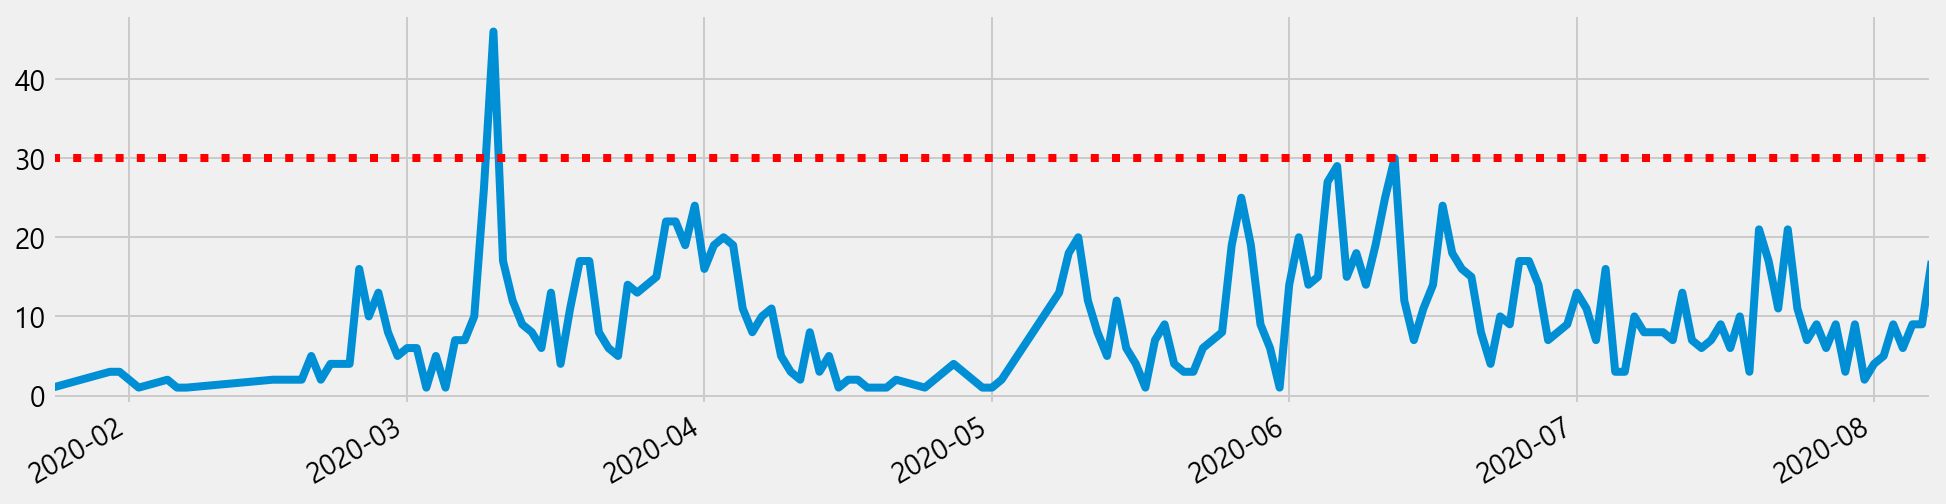

In [123]:
# 확진일자로 선그래프 그리기
df["확진일자"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [124]:
# value_counts()
# 시리즈의 값이 정수, 문자열, 카테고리 값인 경우에 각각의 값이 나온 횟수를 셀 수 있음
# sort_index()
# 인덱스를 기준으로 값을 정렬
# iloc : 순서를 나타내는 정수 기반의 2차원 인덱싱
# loc : 라벨값 기반의 2차원 인덱싱

# 일자별 확진자수를 선그래프로 그림
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일"컬럼을 만든다
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

3

In [125]:
day_count.head(40)

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
02-06     1
02-07     1
02-16     2
02-19     2
02-20     5
02-21     2
02-22     4
02-23     4
02-24     4
02-25    16
02-26    10
02-27    13
02-28     8
02-29     5
03-01     6
03-02     6
03-03     1
03-04     5
03-05     1
03-06     7
03-07     7
03-08    10
03-09    26
03-10    46
03-11    17
03-12    12
03-13     9
03-14     8
03-15     6
03-16    13
03-17     4
03-18    11
03-19    17
03-20    17
03-21     8
Name: 월일, dtype: int64

In [126]:
for i in range(len(day_count)):
        case_count = day_count.iloc[i]
        if case_count>20:
            print(i, case_count)

27 26
28 46
46 22
47 22
49 24
95 25
104 27
105 29
110 25
111 30
116 24
149 21
152 21


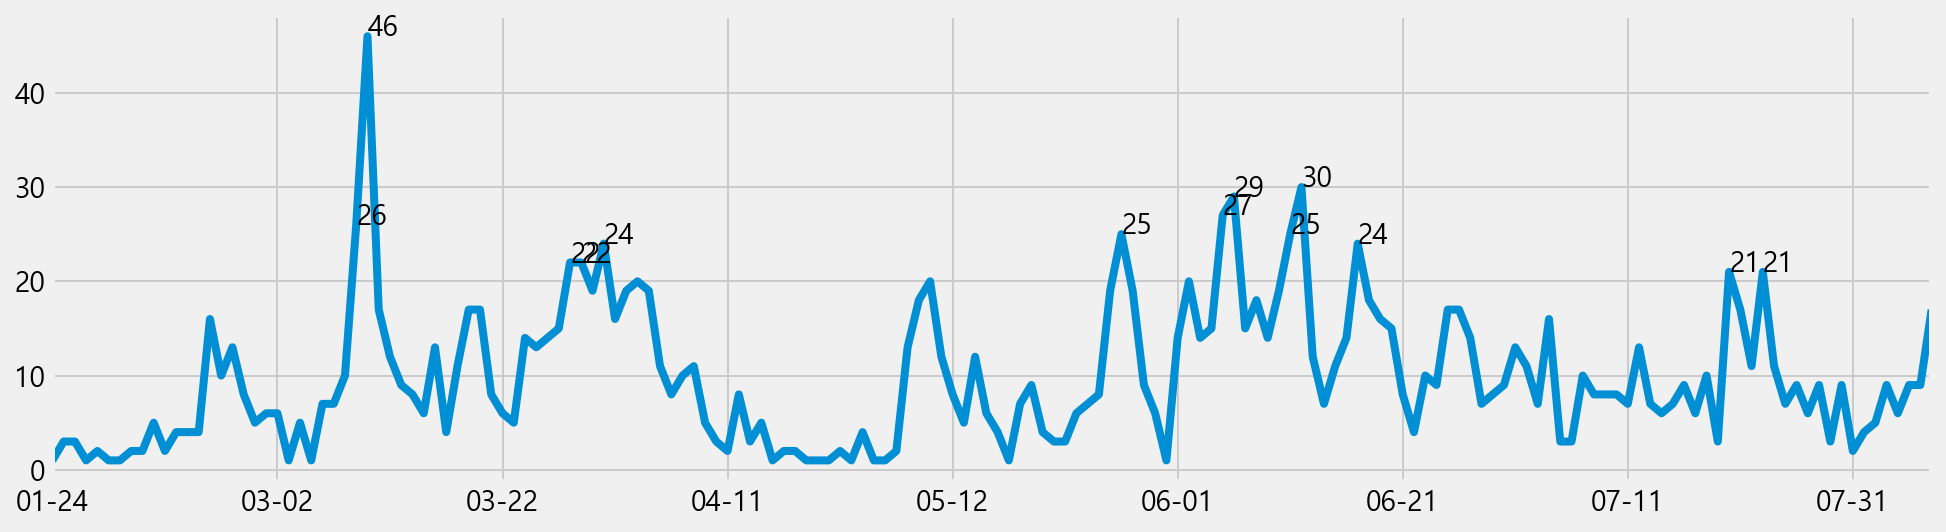

In [127]:
g = day_count.plot(figsize = (15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count>20:
        g.text(x=i,y=case_count, s=case_count)

### 확진자가 가장 많이 나온 날

In [128]:
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
08-03     9
08-04     6
08-05     9
08-06     9
08-07    17
Name: 월일, Length: 168, dtype: int64

In [129]:
# describe를 통해 일자별 확진자 수를 describe를 통해 요약
day_count.describe()

count    168.000000
mean       9.892857
std        7.312556
min        1.000000
25%        4.000000
50%        8.000000
75%       14.000000
max       46.000000
Name: 월일, dtype: float64

In [130]:
# 확진자가 가장 많았던 날
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [131]:
# 확진자가 가장 많았던 날의 발생이력
df[df["월일"] == "03-10"].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1460,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1461,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1462,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1463,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1464,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 막대그래프 그리기

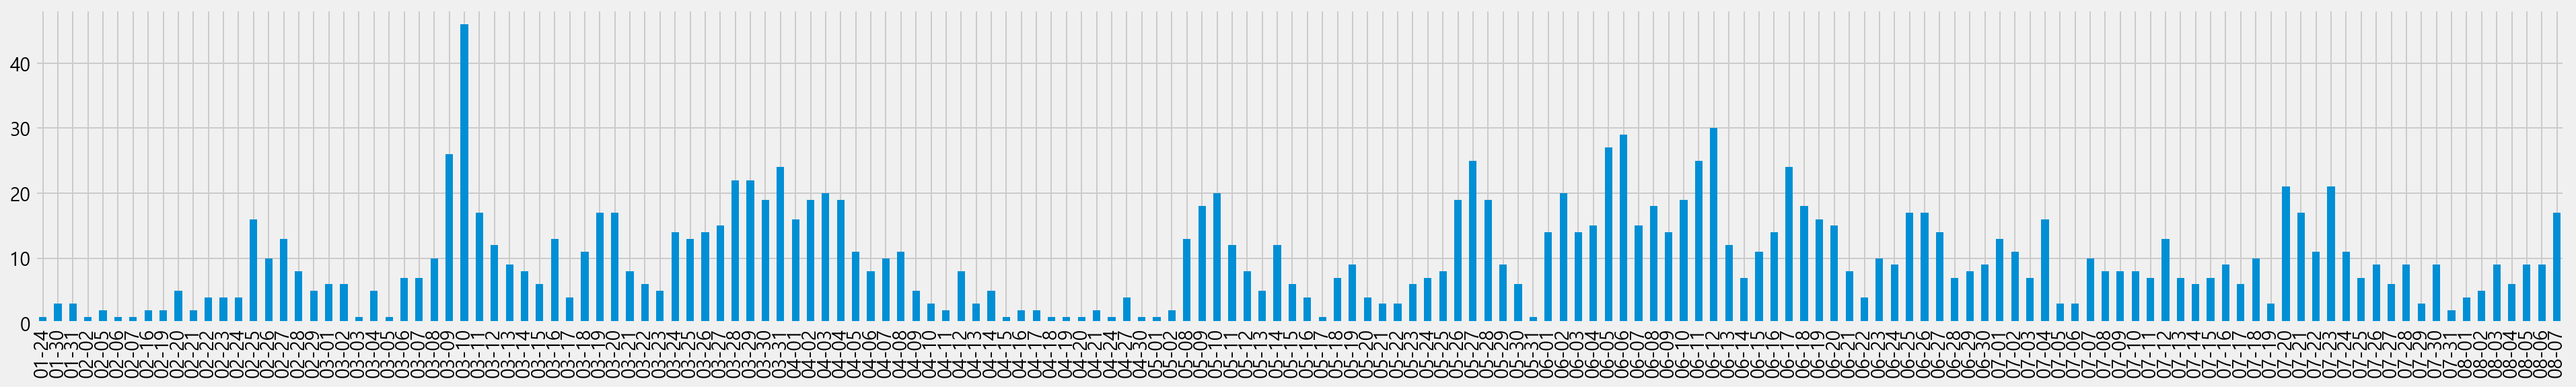

In [132]:
# 선 그래프를 막대그래프로 표현
day_count.plot.bar(figsize = (30,4))

### 최근 데이터만 슬라이싱으로 나눠 그리기

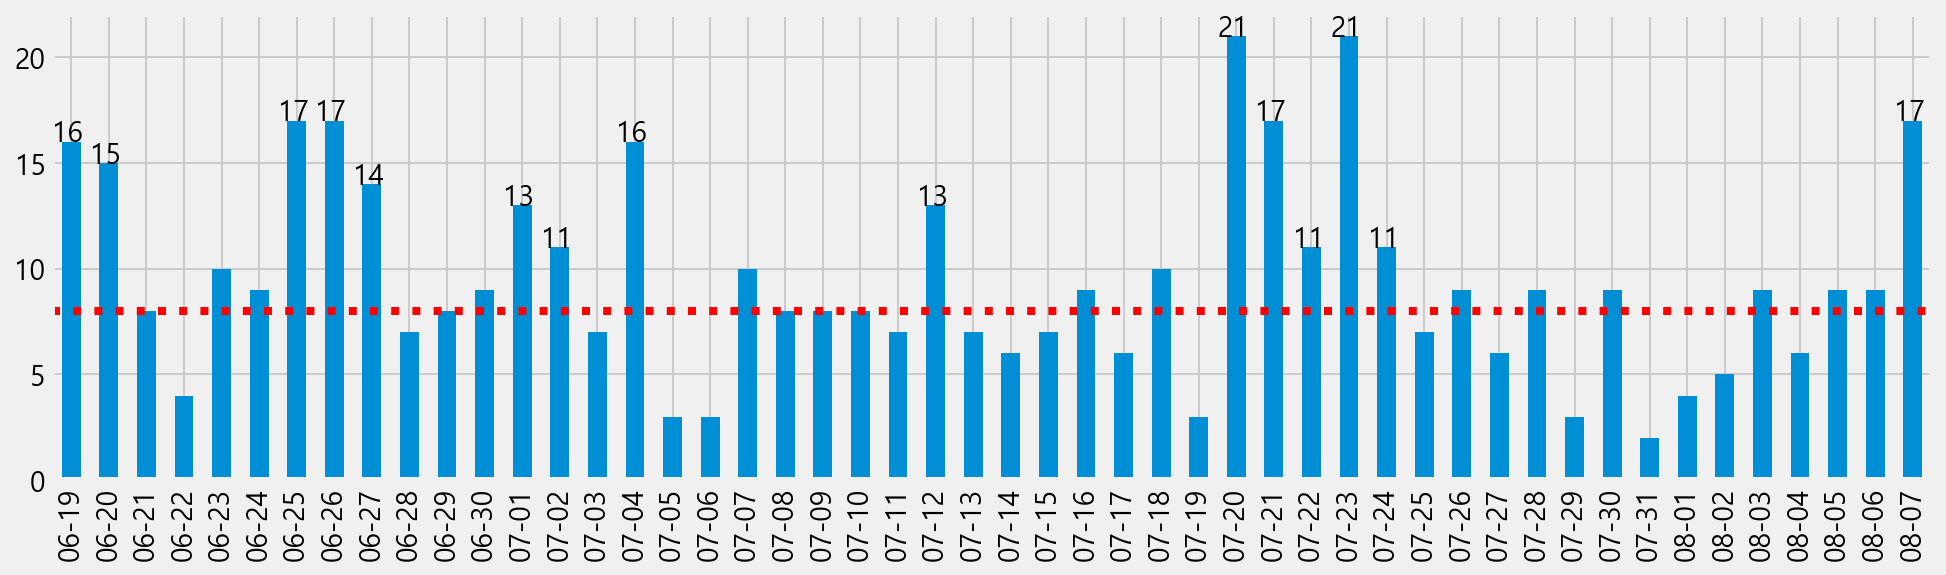

In [133]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

# 데이터 프레임 정의
g = day_count[-50:].plot.bar(figsize=(15, 4))
# 슬라이싱
g.axhline(day_count.median(), linestyle=":", color="red")

# 텍스트 입력
for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

### 월별 확진자 수 그리기

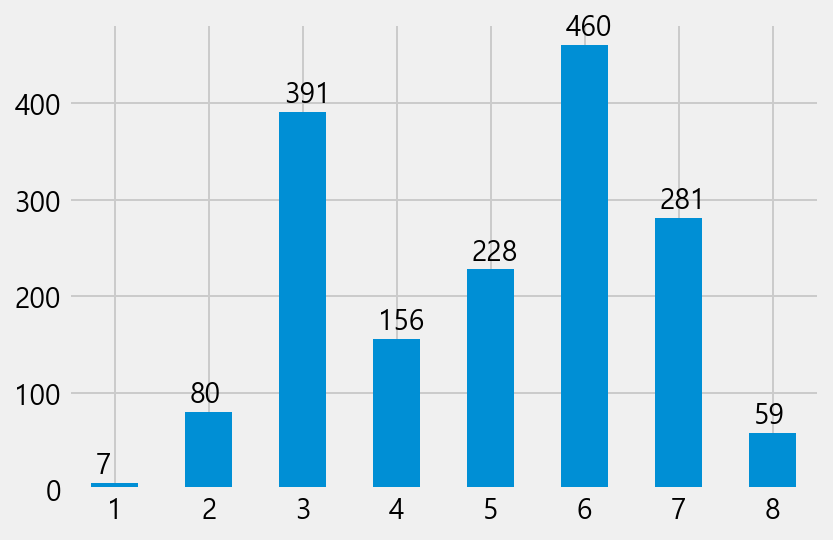

In [134]:
# 월별 확진자 수에 대한 빈도수를 구해서 시각화
month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

### 주단위 확진자수 그리기

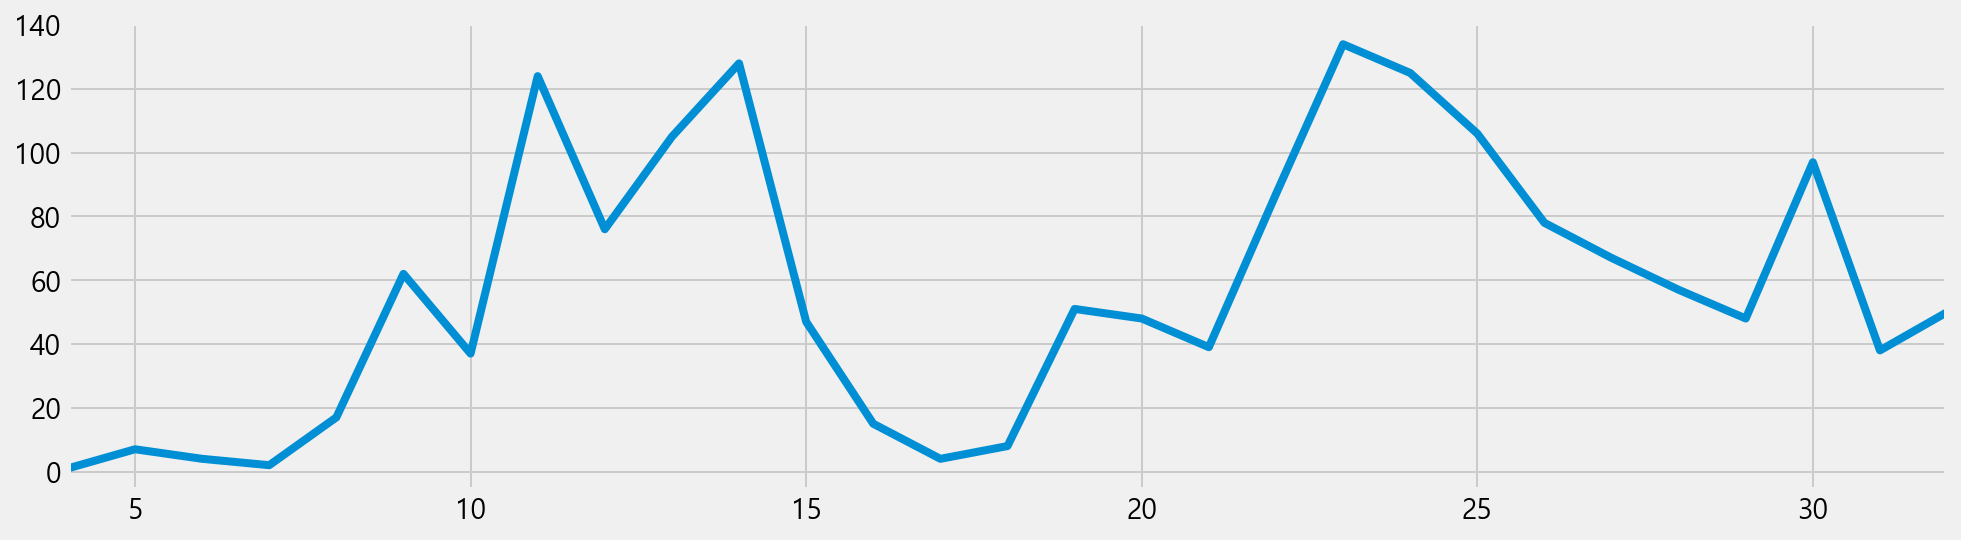

In [135]:
# 주별로 빈도수

weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15, 4))

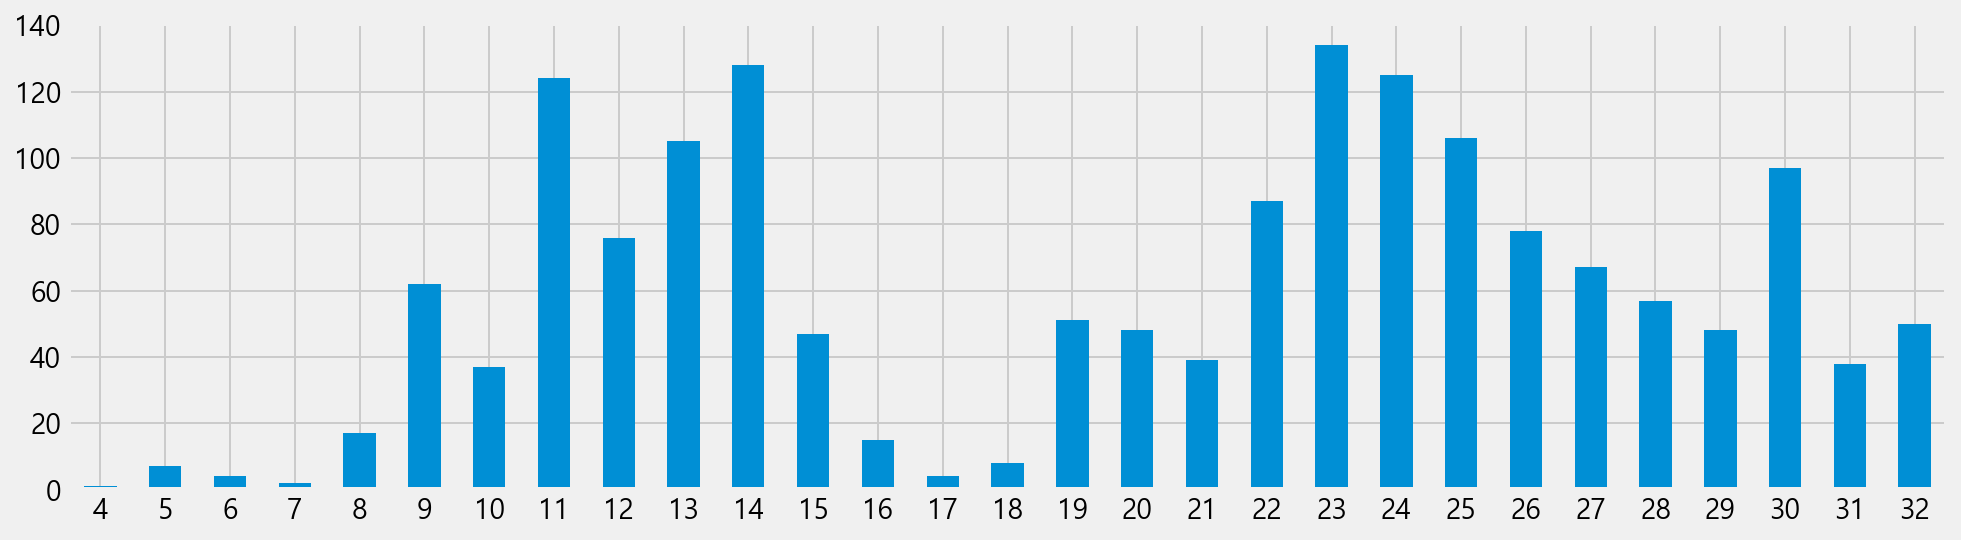

In [136]:
# 주 단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15, 4), rot=0)

### 월-주 함께 그리기

In [137]:
# 월, 주로 그룹화 하여 빈도수를 계산
month_weekly_case = df.groupby(["월","주"])["연번"].count()
month_weekly_case

월  주 
1  4       1
   5       6
2  5       1
   6       4
   7       2
   8      17
   9      56
3  9       6
   10     37
   11    124
   12     76
   13    105
   14     43
4  14     85
   15     47
   16     15
   17      4
   18      5
5  18      3
   19     51
   20     48
   21     39
   22     87
6  23    134
   24    125
   25    106
   26     78
   27     17
7  27     50
   28     57
   29     48
   30     97
   31     29
8  31      9
   32     50
Name: 연번, dtype: int64

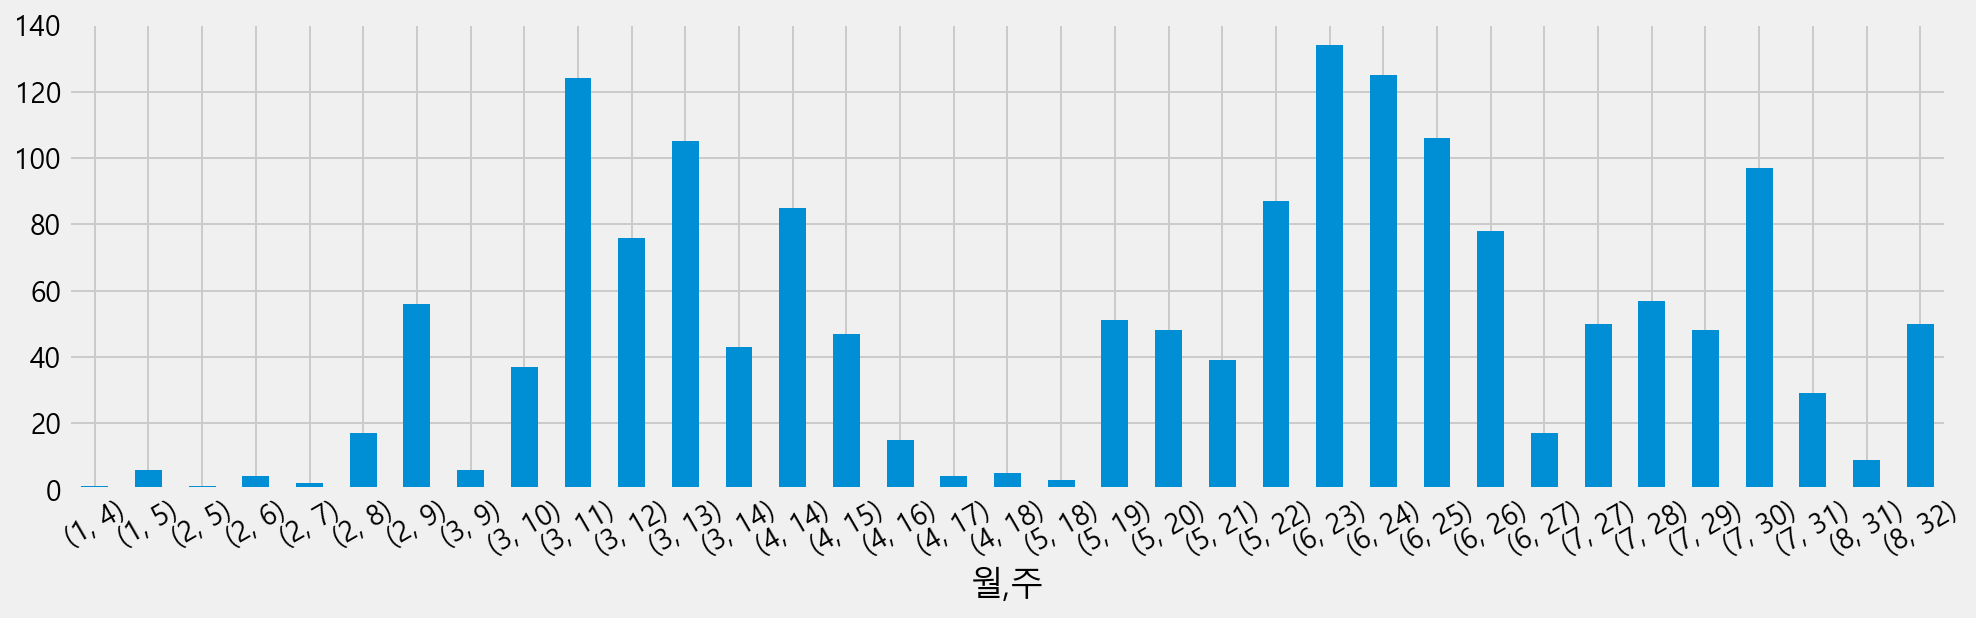

In [138]:
month_weekly_case.plot.bar(figsize=(15,4), rot=30)

# 모든 날짜를 행에 만들어주기

확진자가 없는 날의 데이터도 만들어주기

In [139]:
# 첫 확진일부터 마지막 확진일까지 가져온다
# 데이터 프레임의 첫번째 날짜는 first_day, 마지막 날짜는 last_day에 담는다

# timeit: 코드의 소요시간을 여러 번 측정해 좀 더 정확히 파악할 때 사용
%timeit  first_day = df.iloc[-1, 7]

8.86 µs ± 72.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [140]:
%timeit last_day = df.iloc[0, 7]

8.82 µs ± 92.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [141]:
days = pd.date_range(first_day, last_day)
days[:5]

NameError: name 'first_day' is not defined

# 누적 확진자 수 구하기

### 데이터프레임으로 그리기

### 시리즈로 그리기

### 확진수만 따로 그리기

### 누적확진만 따로 그리기

### 로그 스케일

# 확진월과 요일 구하기

### 요일별 확진 수

# 거주지별 확진자

# 접촉력

### 이태원 클럽 감염

### 감염경로 불명

# 가장 많은 전파가 일어난 번호

# 조치사항

# 퇴원, 사망여부

# 병원

# 여행력

### 여행력이 있는 데이터만 가져와서 서브셋 만들기

### 텍스트 데이터 다루기

### 전체 확진수와 해외유입 확진수 비교

### merge를 통해 전체 확진수와 해외 유입 확진수 비교하기

### 해외 유입 확진자 중 퇴원 여부

### 월별 해외 확진자 수

### 구와 월별 해외 확진자 수 

### 해외 유입이 많은 지역(구)

### 구별 해외 유입 국가 분석하기

### 최근 데이터를 불러와 실습해보기